# Tutorial 2.1: Intrusion Detection System

![Status](https://img.shields.io/static/v1.svg?label=Status&message=Under_Construction&color=orange)


**Open notebook on:** 
[![View filled on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/clandolt/mlcysec_notebooks/blob/main/source/tutorial_notebooks/getting_started_with_ml/getting_started_with_ml.ipynb)
[![Open filled In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/clandolt/mlcysec_notebooks/blob/main/source/tutorial_notebooks/getting_started_with_ml/getting_started_with_ml.ipynb)   
**Author:** Christoph R. Landolt


In cybersecurity, we often face the problem that we don’t have enough labeled attack data to train machine learning models for classifying network traffic.
This has two main reasons:
1. Labeling data is costly.
2. Many attack patterns are unknown, not included in the training set, or related to vulnerabilities that have not yet been discovered.

In this tutorial, we’ll take a look at how to train machine learning models to detect anomalies in network data and flag these anomalies as potential attacks.

## Tutorial Objectives
By the end of this tutorial, you will be able to:
After completing this section, you will be able to:
- Understand the role of Intrusion Detection Systems (IDS) in network security.
- Differentiate between Host-Based and Network-Based IDS.
- Explain how anomaly-based and signature-based detection techniques work.
- Describe real-world deployment strategies of hybrid IDS setups.
- Apply **anomaly detection** algorithms to identify new attack patterns.

## What is an Intrusion Detection System?
An **Intrusion Detection System (IDS)** is designed to protect IT systems by enabling the **early detection of attacks** on computer networks.  
In addition, an IDS helps collect information about **new types of attacks**, which can be used to improve the **preventive protection** of computer networks.

Intrusion Detection Systems (IDS) are often divided into **host-based IDS** and **network-based IDS** according to the type of audit data and into **anomaly-based** and **signature-based** according to the analysis technique.

| Classification Basis | Type | Description |
|----------------------|------|--------------|
| **Source of Data** | Host-Based (HIDS) | Monitors logs, file integrity, and system events on individual hosts. |
|                      | Network-Based (NIDS) | Monitors network traffic and analyzes packets moving through the network. |
| **Detection Method** | Signature-Based | Detects known attack patterns or signatures. |
|                      | Anomaly-Based | Learns normal behavior and identifies deviations as potential intrusions. |

### Host-Based Intrusion Detection System (HIDS)
A HIDS monitors the security status of individual systems or hosts.
These agents, often referred to as sensors, are typically installed on nodes that are considered vulnerable to potential attacks. Since a HIDS is limited to monitoring a single host, a separate instance must be deployed on each device. It collects data about security-related events, usually provided by the operating system through audit trails. These logs contain information about the objects involved in an event, enabling the system to determine which process, program, or user may have caused a security breach.

### Network-Based Intrusion Detection System (NIDS)
A NIDS collects its information from the network itself rather than from individual hosts.  
It operates on an **interception basis**, capturing and analyzing data as it moves through a particular network segment.  
The IDS checks for attacks or irregular behavior by examining the content and header information of packets moving through the network.  
In the case of encrypted traffic, only the **header and metadata** of the packets can be analyzed. For unencrypted traffic, many modern NIDS employ **Deep Packet Inspection (DPI)** to enhance detection capabilities. DPI goes beyond simply checking headers and metadata; it analyzes the **protocol fields and the actual payload** of packets.

By examining both the structure and content of network traffic, DPI can:
- Identify malicious or suspicious payloads in protocols such as HTTP, FTP, DNS, and SMTP.
- Detect anomalies in packet sequences or unusual protocol usage.
- Enforce security policies, such as blocking specific commands or suspicious patterns.

DPI allows NIDS to **detect attacks that might bypass simple signature-based inspection**, providing more granular visibility into network activity, while encrypted traffic remains limited to header and metadata analysis unless decrypted.

Placing the sensors of a pure NIDS at **network transition points** (such as gateways or DMZ boundaries) is a proven technique in practice:

<img src="./Network_Based_IDS.jpg" alt="Network_Based_IDS" width="600"/>

Network sensors have the advantage of being able to monitor large volumes of traffic and efficiently observe entire network zones.  
However, NIDS cannot inspect the contents of encrypted connections.  
As a result, attackers may transmit malicious content over encrypted protocols such as **HTTPS**.  
To mitigate this limitation, it is often advisable to identify **critical systems** and install host-based IDS agents on them:

<img src="./Host_Based_IDS.jpg" alt="Host_Based_IDS" width="600"/>

### Combining HIDS and NIDS
A pure HIDS deployment provides detailed host-level insights but lacks visibility into network-wide activity.  
Contrarily, a pure NIDS can detect traffic anomalies but cannot see events occurring within individual systems.  
For this reason, **a combination of both HIDS and NIDS** is commonly used in practice: NIDS monitors overall network traffic, while HIDS protects the most critical systems.

<img src="./IDS-Configuration.jpg" alt="IDS-Configuration" width="600"/>

## Anomaly Detection: Handling Rare and Diverse Attacks
In real-world network security, attacks are often **rare, diverse, and unknown**. Unlike normal traffic, malicious behavior may appear in small quantities and differ significantly from each other. This presents challenges for traditional signature-based detection systems, which rely on known patterns.

Anomaly detection approaches aim to **learn the normal behavior of a system** and flag deviations as potential attacks. These anomalies can indicate previously unseen attack types or unexpected misuse.

### Types of Malicious Behavior

Some common categories of anomalous or malicious network behavior include:
- **Probing / Reconnaissance:** Scanning networks, ports, or services to gather information about potential targets.  
- **Unauthorized Access Attempts:** Attempts to log in or gain privileges without proper authorization.  
- **Data Exfiltration:** Moving sensitive data outside the network without permission.  
- **Denial of Service (DoS / DDoS):** Overloading resources to disrupt service availability.  
- **Malware Communication:** Abnormal traffic generated by infected hosts communicating with command-and-control servers.  
- **Payload Attacks:** Injection of malicious content, such as SQL injection, XSS, or buffer overflows.  
- **Configuration Exploits:** Attempts to exploit misconfigurations, weak permissions, or default credentials.  
- **Policy Violations:** Actions that do not follow the normal behavior of users or applications, e.g., uploading unexpected file types or sending unusually large requests.  

By detecting these anomalous behaviors, **anomaly-based IDS** can complement signature-based systems, helping identify both known and previously unseen threats.  

#### Intruder Behaviour Patterns
Intruders can be divided into three groups:
- **Hackers:** They hack into computers for the thrill.
- **Criminals:** A criminal has a specific target in mind.
- **Insider Attacks:** Insiders can be motivated by revenge or money. They are challenging to detect and have valuable knowledge and access to the systems or to the company network.
- **State actors:** This group has considerable human and financial resources and often pursues geostrategic and military objectives through cyber espionage, disinformation campaigns,and cyber-attacks.

## The Cyber Kill Chain

Lockheed Martin's **Cyber Kill Chain©** framework outlines attacker behavior and detection opportunities:

1. **Reconnaissance:** Identifying targets and exposed internet-facing servers.
2. **Weaponization:** Coupling malware with an exploit to create a deliverable.
3. **Delivery:** Sending malware to the target (e.g., email, web, USB).
4. **Exploitation:** Triggering the exploit to gain access; unknown exploits are “zero-day” attacks.
5. **Installation:** Deploying persistent backdoors to maintain long-term access.
6. **Command and Control (C2):** Remote management of compromised systems.
7. **Actions on Objectives:** Internal reconnaissance, lateral movement, and data exfiltration.

<img src="./life_cycle_of_advanced_targeted_attacks.jpg" alt="IDS-Configuration" width="600"/>


#### The Importance of Early Detection

Early detection is critical for minimizing the impact of cyber attacks such as worms, ransomware, or other self-propagating malware.  
Detecting threats before they reach their **rapid growth phase** can prevent large-scale infections, data loss, and network downtime.

The figure below illustrates different **worm propagation curves** and the importance of the **detection window**:

- **Early Detection Window:** The ideal phase for identifying and containing a threat. At this point, only diagnostic variants (initial infections or early forms of the worm) are active, and containment is highly effective.  
- **Critical Detection Window:** A short time before exponential growth, where delayed detection still prevents total network compromise but requires more intensive mitigation.  
- **Rapid Growth Phase:** The worm spreads quickly across the network, making containment difficult and costly.  
- **Saturation Phase:** The attack reaches its peak; most vulnerable systems are compromised.

The three curves represent how detection timing affects propagation:

- **Normal Propagation Curve:** Represents uncontrolled worm spread without early detection.  
- **Delayed Propagation Curve:** Detection occurs later, slowing but not fully stopping the infection.  
- **Intercepted Propagation Curve:** Early detection effectively halts the spread before reaching the critical growth phase.

<img src="./worm_propagation_model.jpg" alt="IDS-Configuration" width="600"/>

In practice, IDS that identify anomalies during the *early detection window* play a vital role in preventing outbreaks before they can escalate.


## ML Based Anomaly Detection


In [12]:
### Importing required libraries

import time
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDOneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.cluster import KMeans, DBSCAN
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

## Isolation Forest
The [KDDCUP99 dataset](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html) is a benchmark dataset for **network intrusion detection**.  
It contains simulated network traffic labeled as either *normal* or *attack*.

In this example, we’ll train a simple model to detect anomalies (potential cyber attacks).

In [13]:
### Importing required libraries

import time
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDOneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


**Notes:**
- `pandas` and `numpy` are used for data loading and manipulation.  
- `matplotlib` and `seaborn` handle visualization.  
- `IsolationForest` is a tree-based model ideal for **outlier detection** (useful in cybersecurity anomaly detection).


### Make a Prediction

#### Step 1: Load and Explore the KDDCUP99 Dataset

The **KDDCUP99 dataset** is a benchmark for evaluating intrusion detection systems.  
It contains labeled network traffic data — distinguishing between *normal* and *attack* connections.

We’ll use a subset (`SA`) of the data to keep computation manageable.



10065 datapoints with 338 anomalies (3.36%)


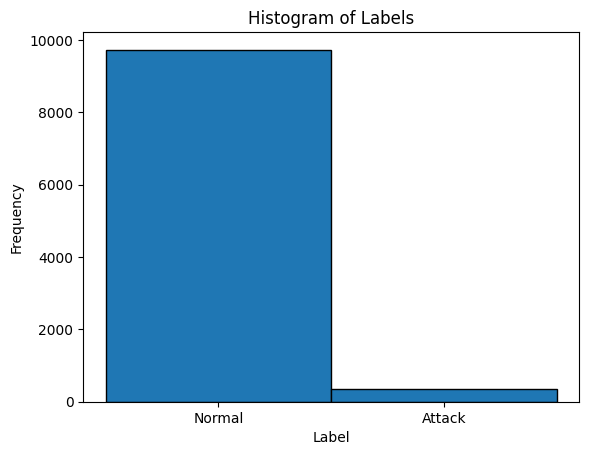

In [14]:
# Load KDD Cup 99 dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.fetch_kddcup99(
    subset="SA",             # Use the 'SA' subset (smaller sample)
    percent10=True,          # Use 10% of the full dataset for efficiency
    random_state=42,         # Ensure reproducibility
    return_X_y=True,         # Return data and labels separately
    as_frame=True            # Load as pandas DataFrame
)

# Convert binary label: 1 = attack, 0 = normal
y = (y != b"normal.").astype(np.int32)

# Take only 10% of the data for quick demonstration
X, _, y, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=42)

# Display dataset stats
n_samples, anomaly_frac = X.shape[0], y.mean()
print(f"{n_samples} datapoints with {y.sum()} anomalies ({anomaly_frac:.02%})")

# Plot label distribution
plt.hist(y, bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xticks([0, 1], ['Normal', 'Attack'])
plt.title('Histogram of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()


**Notes:**

- `fetch_kddcup99()` conveniently downloads and loads the dataset from scikit-learn’s built-in datasets.  
- Labels are converted from text (`b"normal."`, `b"attack"`) to integers (`0` and `1`).  
- The histogram provides a quick look at **class imbalance**, which is typical in cybersecurity data — attacks are rarer than normal events.  
- Using only 10% of the dataset keeps the demo lightweight while preserving statistical patterns.


#### Step 2: Data Preprocessing

Before training, categorical (non-numeric) features must be converted into numerical form.
We’ll use **one-hot encoding** with `pandas.get_dummies()`.


In [15]:
# Convert categorical variables to numerical format
X = pd.get_dummies(X)

print(f"Feature matrix shape after encoding: {X.shape}")
X.head()


Feature matrix shape after encoding: (10065, 6536)


duration_0  duration_1  duration_2  duration_3  duration_4  duration_5  \
26890        True       False       False       False       False       False   
35471       False        True       False       False       False       False   
37027        True       False       False       False       False       False   
80164       False       False       False       False       False       False   
73649        True       False       False       False       False       False   

       duration_6  duration_7  duration_8  duration_9  ...  \
26890       False       False       False       False  ...   
35471       False       False       False       False  ...   
37027       False       False       False       False  ...   
80164       False       False       False       False  ...   
73649       False       False       False       False  ...   

       dst_host_srv_rerror_rate_0.91  dst_host_srv_rerror_rate_0.92  \
26890                          False                          False   
35471                          False                          False   
37027                          False                          False   
80164                          False                          False   
73649                          False                          False   

       dst_host_srv_rerror_rate_0.93  dst_host_srv_rerror_rate_0.94  \
26890                          False                          False   
35471                          False                          False   
37027                          False                          False   
80164                          False                          False   
73649                          False                          False   

       dst_host_srv_rerror_rate_0.95  dst_host_srv_rerror_rate_0.96  \
26890                          False                          False   
35471                          False                          False   
37027                          False                          False   
80164                          False                          False   
73649                          False                          False   

       dst_host_srv_rerror_rate_0.97  dst_host_srv_rerror_rate_0.98  \
26890                          False                          False   
35471                          False                          False   
37027                          False                          False   
80164                          False                          False   
73649                          False                          False   

       dst_host_srv_rerror_rate_0.99  dst_host_srv_rerror_rate_1.0  
26890                          False                         False  
35471                          False                         False  
37027                          False                         False  
80164                          False                         False  
73649                          False                         False  

[5 rows x 6536 columns]

**Notes:**
- Many columns in KDDCUP99 are categorical (e.g., protocol type, service, flag).
- One-hot encoding converts these categories into binary vectors, making them compatible with ML models.


### Step 3: Train-Test Split

We split the dataset into **training (80%)** and **testing (20%)** subsets.


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 8052
Testing samples: 2013


#### Step 4: Model Training – Isolation Forest

We use **Isolation Forest**, a classic unsupervised anomaly detection algorithm.  
It identifies unusual data points (potential attacks) by isolating them in a decision tree ensemble.


In [17]:
# Train Isolation Forest for anomaly detection
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(X_train)


IsolationForest(contamination=0.1, random_state=42)

**Notes:**
- `contamination` estimates the expected fraction of anomalies.
- The algorithm isolates anomalies faster because they are easier to separate from normal data.


#### Step 5: Make Predictions and Evaluate the Model


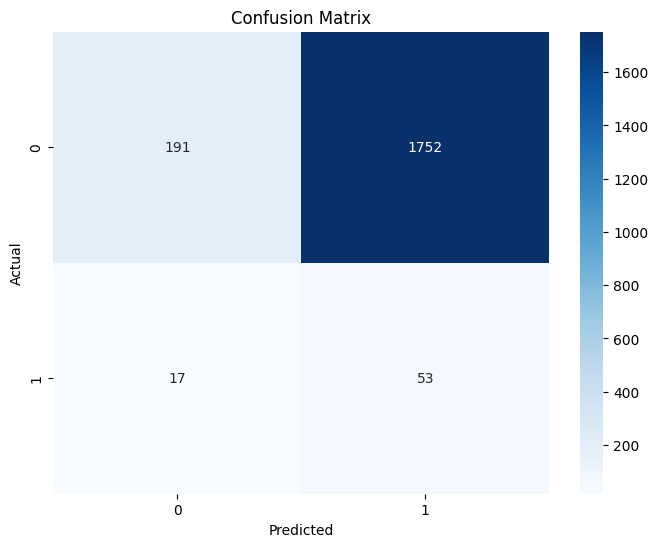

In [18]:
# Predict outliers in the test set
y_pred = clf.predict(X_test)

# Convert predictions to binary format (1 = normal, 0 = anomaly)
y_pred_binary = [1 if pred == 1 else 0 for pred in y_pred]

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Notes:**
- The confusion matrix shows **true positives**, **false positives**, **true negatives**, and **false negatives**.
- A perfect model would have all predictions along the diagonal.
- Since this is an anomaly detection model, some misclassifications are expected.


### Step 6: Visualize Feature Space with PCA

To understand how the model separates normal vs attack samples,  
we can project the high-dimensional data into **2D space** using **Principal Component Analysis (PCA)**.


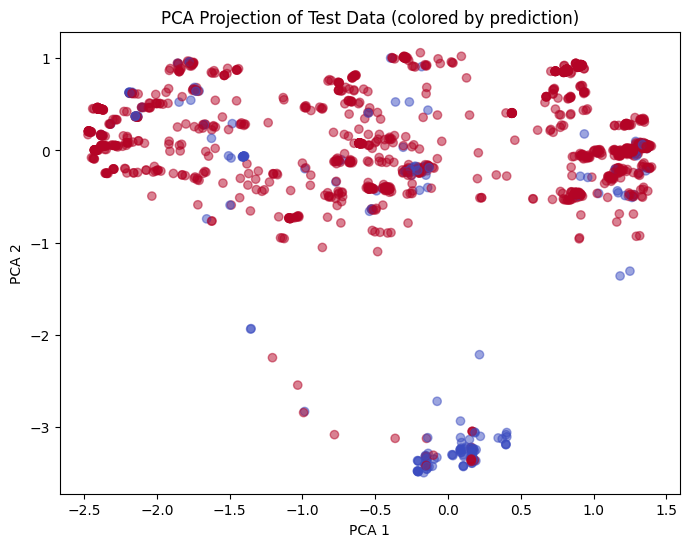

In [19]:
# Apply PCA for visualization
pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X_test)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_pred_binary, cmap='coolwarm', alpha=0.5)
plt.title('PCA Projection of Test Data (colored by prediction)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


**Notes:**
- PCA reduces the feature space to two dimensions for visualization.
- Points are colored by prediction: **normal (blue)** and **attack (red)**.
- You can often see separable clusters corresponding to different traffic patterns.


## Detect Outliers

In this section, we compare several **classic anomaly detection algorithms** on a 2D representation of the **KDDCUP99** cybersecurity dataset.

Anomaly detection (or outlier detection) is a core task in cybersecurity, as many attacks are characterized by rare or unusual patterns in network traffic.

We’ll visualize how different algorithms identify such anomalies after reducing the dataset to two dimensions using **PCA**.


In [20]:
# Example adapted from:
# https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html

matplotlib.rcParams["contour.negative_linestyle"] = "solid"

# Load KDDCup99 dataset (subset for simplicity)
from sklearn import datasets
kddcup99 = datasets.fetch_kddcup99(subset='SA', percent10=True)

# Extract data and labels
X = kddcup99.data
y = kddcup99.target


**Notes:**
- The **KDDCUP99** dataset is widely used for network intrusion detection research.
- It contains both categorical and numerical features.
- The `subset='SA'` option loads a smaller portion for faster experimentation.


### Step 1: Preprocessing the Data
We convert **categorical features** to numerical format using **one-hot encoding**.


In [21]:
# Convert categorical features into numerical form
enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(X)


**Notes:**
- `OneHotEncoder` transforms non-numeric columns (like protocol types) into binary vectors.
- `handle_unknown='ignore'` ensures that unseen categories at prediction time don’t cause errors.


### Step 2: Reduce Dimensionality for Visualization
Since the dataset has many features, we use **PCA** (Principal Component Analysis) to project it into **2D space**.


In [22]:
# Apply PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())


**Notes:**
- PCA helps visualize how algorithms distinguish between normal and anomalous data.
- Each data point is now represented by two principal components capturing most of the variance.


### Step 3: Define Experiment Parameters
We set up a small synthetic experiment by adding random outliers to the PCA-reduced data.


In [23]:
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers


**Notes:**
- `outliers_fraction` defines the expected proportion of anomalies.
- We’ll later add artificial outliers to make the comparison more visual.


### Step 4: Define and Configure Anomaly Detection Algorithms
We will compare several popular outlier detection methods:
- **EllipticEnvelope (Robust Covariance)**
- **One-Class SVM**
- **SGD One-Class SVM (approximated with Nystroem kernel)**
- **Isolation Forest**
- **Local Outlier Factor**


In [24]:
# Define anomaly detection models
anomaly_algorithms = [
    (
        "Robust covariance",
        EllipticEnvelope(contamination=outliers_fraction, random_state=42),
    ),
    (
        "One-Class SVM",
        svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1),
    ),
    (
        "One-Class SVM (SGD)",
        make_pipeline(
            Nystroem(gamma=0.1, random_state=42, n_components=150),
            SGDOneClassSVM(
                nu=outliers_fraction,
                shuffle=True,
                fit_intercept=True,
                random_state=42,
                tol=1e-6,
            ),
        ),
    ),
    (
        "Isolation Forest",
        IsolationForest(contamination=outliers_fraction, random_state=42),
    ),
    (
        "Local Outlier Factor",
        LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction),
    ),
]


**Notes:**
- Each algorithm uses a different approach:
  - **EllipticEnvelope** fits an ellipse to data assuming Gaussian distribution.
  - **One-Class SVM** learns a boundary separating normal from anomalous data.
  - **Isolation Forest** isolates anomalies via random decision trees.
  - **Local Outlier Factor (LOF)** measures local density deviation.
- Using multiple algorithms allows you to understand trade-offs in speed and accuracy.


### Step 5: Run the Algorithms and Visualize Results
We apply each method to the dataset and visualize their decision boundaries.


/Users/christophlandolt/.pyenv/versions/mlcysec25/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/Users/christophlandolt/.pyenv/versions/mlcysec25/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


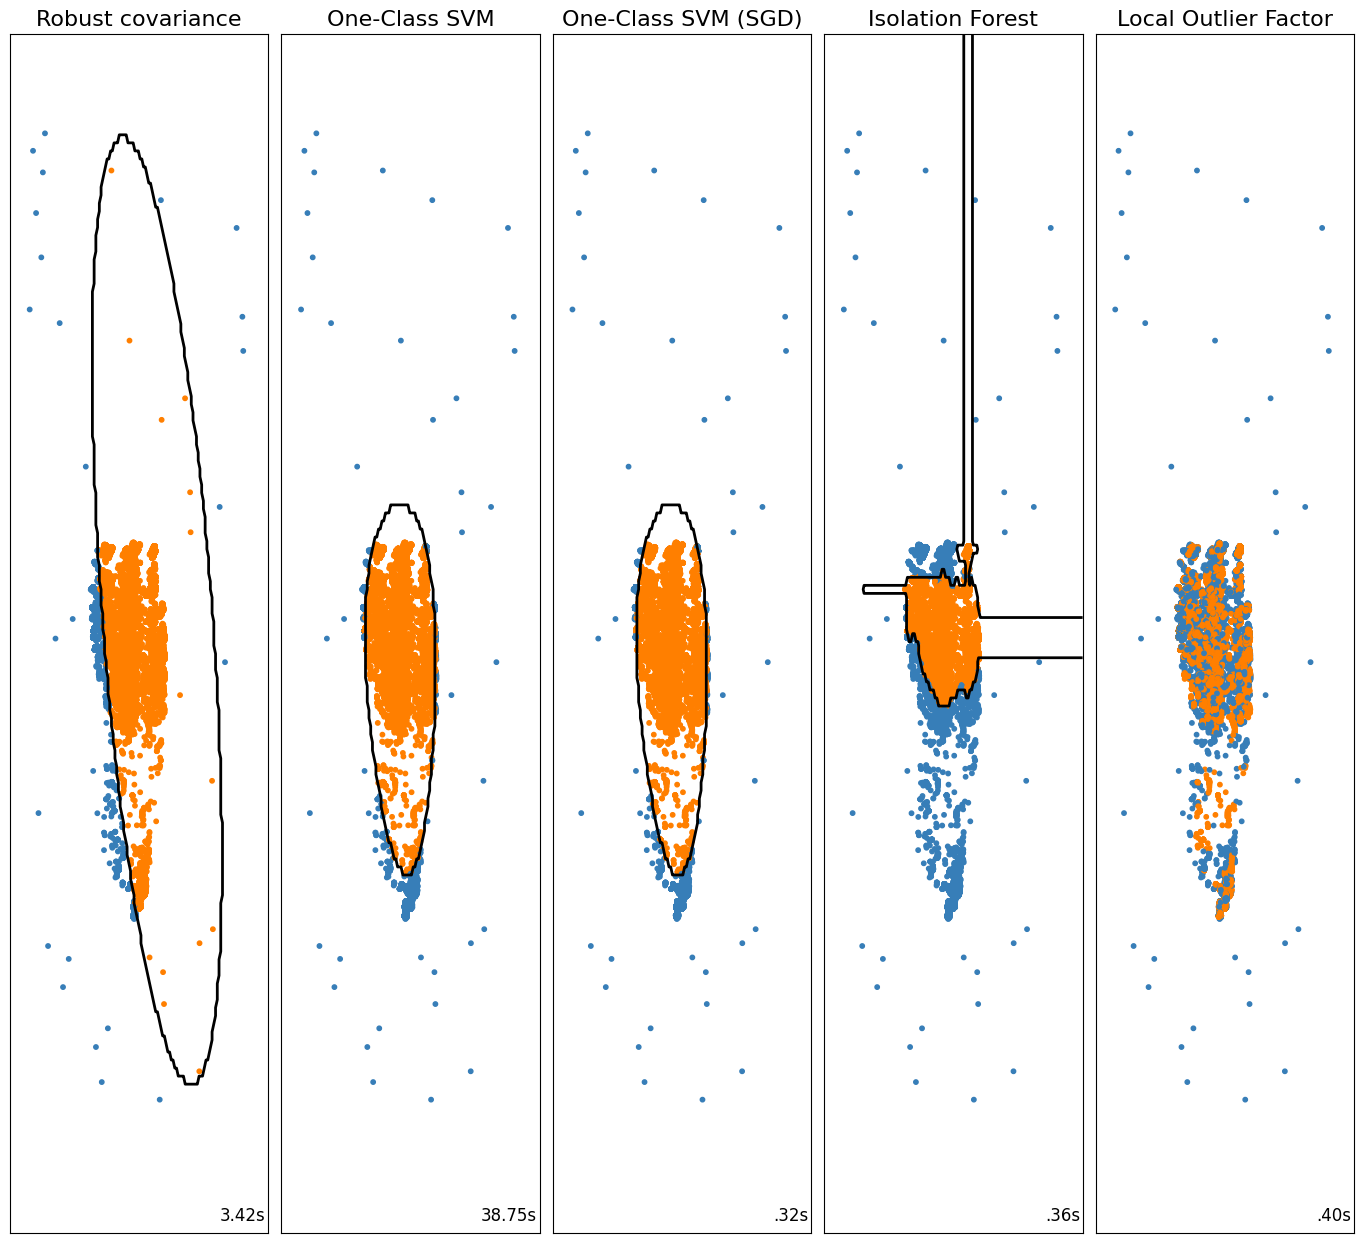

In [25]:
datasets = [X_pca]
xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 4, 12.5))
plt.subplots_adjust(left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets):
    # Add random outliers for visualization
    X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()

        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=16)

        # Predict outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # Draw decision boundary
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

        # Plot data points
        colors = np.array(["#377eb8", "#ff7f00"])  # Blue: normal, Orange: anomaly
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=12,
            horizontalalignment="right",
        )

        plot_num += 1

plt.show()


**Notes:**
- The contour lines represent the model’s decision boundaries between normal and anomalous regions.
- Points in **orange** are detected as outliers.
- The time in each subplot corner shows how long the model took to fit and predict.
- This comparison highlights:
  - **Speed** (e.g., Isolation Forest is often fastest)
  - **Smoothness** (e.g., SVM-based models yield clean boundaries)
  - **Sensitivity** (LOF and Isolation Forest can detect local deviations)

### Step 6: Evaluate and Compare Outlier Detection Performance

To quantify how well each algorithm detects anomalies,  
we can compute a **confusion matrix** comparing the model’s predictions to the true labels.

This allows us to measure:
- **True Positives (TP)** — correctly detected anomalies  
- **False Positives (FP)** — normal points incorrectly flagged as anomalies  
- **True Negatives (TN)** — correctly identified normal points  
- **False Negatives (FN)** — anomalies missed by the model


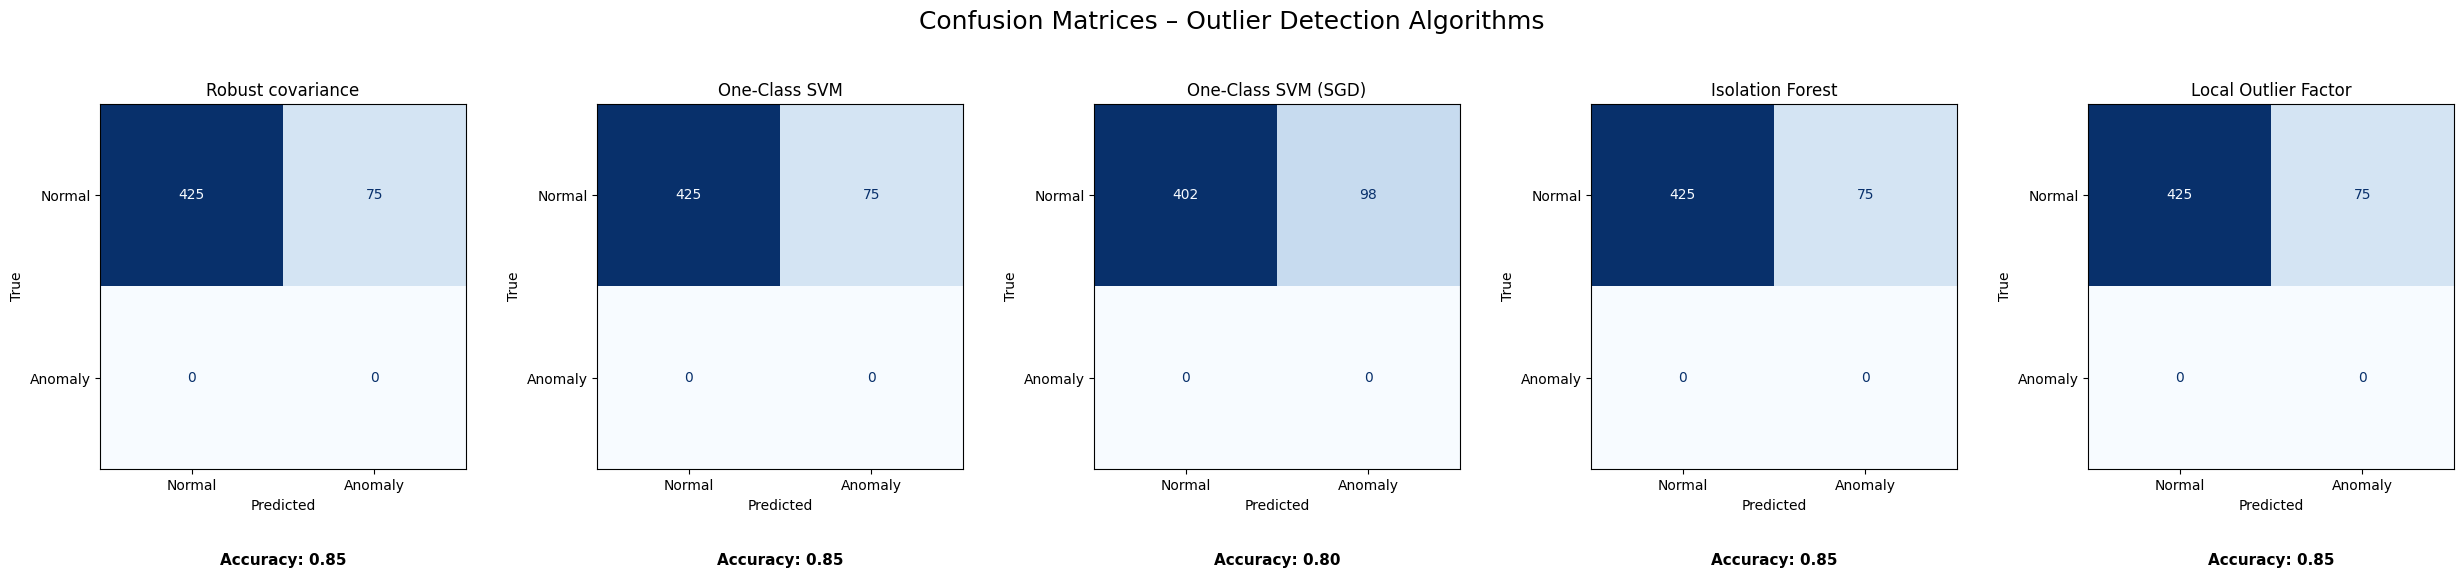

In [26]:
# Reduce to smaller sample for evaluation
X_eval = X_pca[:500]
y_eval = y[:500]
y_eval_binary = (y_eval != b'normal.').astype(int)  # 1 = anomaly, 0 = normal

# Create subplot grid
n_algos = len(anomaly_algorithms)
fig, axes = plt.subplots(1, n_algos, figsize=(5 * n_algos, 5))
fig.suptitle("Confusion Matrices – Outlier Detection Algorithms", fontsize=18, y=1.08)

results = []

for ax, (name, algorithm) in zip(axes, anomaly_algorithms):
    try:
        # Fit and predict
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X_eval)
        else:
            y_pred = algorithm.fit(X_eval).predict(X_eval)

        # Convert predictions to binary: -1 → anomaly (1), 1 → normal (0)
        y_pred_binary = np.where(y_pred == -1, 1, 0)

        # Compute confusion matrix and accuracy
        cm = confusion_matrix(y_eval_binary, y_pred_binary)
        acc = accuracy_score(y_eval_binary, y_pred_binary)
        results.append((name, cm, acc))

        # Plot confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])
        disp.plot(ax=ax, cmap="Blues", colorbar=False)
        ax.set_title(name, fontsize=12)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("True")

        # Show accuracy below each plot
        ax.text(
            0.5, -0.25,
            f"Accuracy: {acc:.2f}",
            ha="center", va="center", transform=ax.transAxes,
            fontsize=11, color="black", fontweight="bold"
        )

    except Exception as e:
        ax.axis("off")
        ax.text(
            0.5, 0.5,
            f"{name}\nfailed:\n{e}",
            ha="center", va="center", fontsize=10, color="red"
        )

plt.tight_layout()
plt.show()


**Notes:**
- We convert labels and predictions into **binary format**:  
  - `0` → Normal  
  - `1` → Anomaly
- Each confusion matrix shows how many samples were correctly or incorrectly classified.
- Blue intensity corresponds to the number of samples in each category.


---

[![Star our repository](https://img.shields.io/static/v1.svg?logo=star&label=⭐&message=Star%20Our%20Repository&color=yellow)](https://github.com/clandolt/mlcysec_notebooks/)  If you found this tutorial helpful, please **⭐ star our repository** to show your support.   
[![Ask questions](https://img.shields.io/static/v1.svg?logo=star&label=❔&message=Ask%20Questions&color=9cf)](https://github.com/clandolt/mlcysec_notebooks/issues)  For any **questions**, **typos**, or **bugs**, kindly open an issue on GitHub — we appreciate your feedback!

---